In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns  
from scipy.stats import linregress
from functools import partial

In [ ]:
data = pd.read_csv('../data/1_salary.csv', index_col=0)
data.head()

The data visualised on the graph

In [ ]:
plt.figure(figsize=(16,6))
sns.lineplot(data=data,x=data['YearsExperience'], y=data['Salary'])

Implementation

In [ ]:
def cost_func(x:pd.Series,y:pd.Series,w:float,b:float):
    m = len(x)
    return np.sum(((w*x)+b-y)**2)/(2*m)

In [ ]:
def gradients(x:pd.Series,y:pd.Series,w:float,b:float):
    '''
    x=Years Experience
    y=Salary
    Returns dj_dw, dj_db
    '''
    m=len(x)
    sum_w=0
    sum_b=0
    sum_w=np.sum(((w*x)+b-y)*x)
    sum_b=np.sum((w*x)+b-y)
    dj_dw=sum_w/m
    dj_db=sum_b/m
    return dj_dw, dj_db

In [14]:
def descent(x:pd.Series,y:pd.Series,w_init:float, b_init:float, alpha:float):
    '''
    The main func
    '''
    max_iterations=10000
    history=pd.DataFrame(columns=['w', 'b', 'cost_func', 'w_grad', 'b_grad'], index=np.arange(0, max_iterations))

    dj_dw=gradients(x,y,w_init, b_init)[0]
    dj_db=gradients(x,y,w_init, b_init)[1]

    w=w_init-(alpha*dj_dw)
    b=b_init-(alpha*dj_db)
    tolerance=1e-6
    
    iterations=0
    while (abs(dj_dw)>tolerance or abs(dj_db)>tolerance) and iterations<max_iterations:
        dj_dw=gradients(x,y,w, b)[0]
        dj_db=gradients(x,y,w, b)[1]
        w=w-(alpha*dj_dw)
        b=b-(alpha*dj_db)
        history.loc[iterations]=[w,b, cost_func(x,y,w,b), dj_dw, dj_db]
        iterations+=1
        if iterations%1000==0:
            print(f'\r{iterations}/10000 Done!')
    
    history.dropna(inplace=True) #removing empty rows
    #history.to_csv('../data/generated/1_history.csv')
    return history  

In [15]:
newdata=descent(data['YearsExperience'], data['Salary'], 0,0,0.03)
w,b=newdata.loc[newdata['cost_func'].idxmin()]['w'], newdata.loc[newdata['cost_func'].idxmin()]['b']

1000/10000 Done!
2000/10000 Done!
3000/10000 Done!


Plotting my model on the graph

<Axes: xlabel='YearsExperience', ylabel='Salary'>

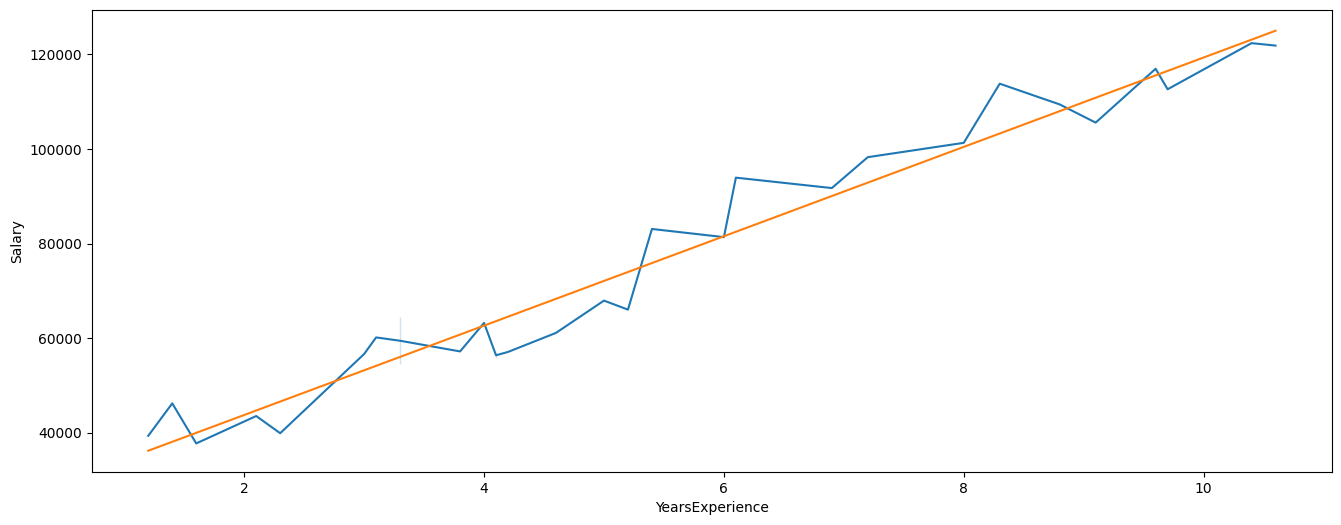

In [16]:
plt.figure(figsize=(16,6))
sns.lineplot(data=data,x=data['YearsExperience'], y=data['Salary'])
x = np.linspace(data['YearsExperience'].min(),data['YearsExperience'].max(),2)
y=w*x+b
sns.lineplot(x=x, y=y)

Creating Animation(Optional)

In [ ]:
slope, intercept, r_value, p_value, stderr = linregress(data['YearsExperience'], data['Salary'])
y2=slope*x+intercept

x = np.linspace(data['YearsExperience'].min(),data['YearsExperience'].max(),2)
fig, ax = plt.subplots()
skiline,=ax.plot([], [], color='blue', lw=2, label='SkiPy\'s Line')
skiline.set_data(x, ((slope*x)+intercept))
line,=ax.plot([], [], color='red', lw=2, label='Self Implemented Line')

sns.lineplot(data=data,x=data['YearsExperience'], y=data['Salary'], ax=ax)
def init():
    line.set_data([], [])
    line
    return line
def animation(frame, Hdata:pd.DataFrame):
    w=Hdata.loc[frame, 'w']
    b=Hdata.loc[frame, 'b']
    line.set_data(x, ((w*x)+b))
    ax.set_title(f"Iteration {frame}: w={w:.2f}, b={b:.2f}")
    return line
ani = FuncAnimation(fig, partial(animation, Hdata=newdata), frames=newdata.index.max(),init_func=init ,interval=0.005)
ax.legend()
plt.show()
ani.save('../assets/1_linearregression.gif', writer='pillow')

Comparison with Skipy using R-Squared


In [17]:
slope, intercept, r_value, p_value, stderr = linregress(data['YearsExperience'], data['Salary'])

tss=0
rss_SELF=0
rss_SKI=0
def model(x):
    '''
    My model
    '''
    y=w*x+b
    return y
def model2(x):
    '''
    Skipy's model'''
    y=slope*x+intercept
    return y
for i in range(len(data['Salary'])):
    s_tss=(data['Salary'][i]-data['Salary'].mean())**2
    s_rss_SELF=(data['Salary'][i]-(model(data['YearsExperience'][i])))**2
    s_rss_SKI=(data['Salary'][i]-(model2(data['YearsExperience'][i])))**2
    tss+=s_tss
    rss_SELF+=s_rss_SELF
    rss_SKI+=s_rss_SKI

r2_SELF= 1-(rss_SELF/tss)
r2_SKI= 1-(rss_SKI/tss)
print('SELF:', r2_SELF, 'SKIPY\'s:', r2_SKI)

SELF: 0.9569566641435086 SKIPY's: 0.9569566641435086
